In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [25]:
df = pd.read_csv("data_post.csv")
df

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
0,0.444444,0.000000,0.000000,0.000000,0.111111,0.000000,0.222222,0.000000,0.000000,2
1,0.444444,0.333333,0.333333,0.444444,0.666667,1.000000,0.222222,0.111111,0.000000,2
2,0.222222,0.000000,0.000000,0.000000,0.111111,0.111111,0.222222,0.000000,0.000000,2
3,0.555556,0.777778,0.777778,0.000000,0.222222,0.333333,0.222222,0.666667,0.000000,2
4,0.333333,0.000000,0.000000,0.222222,0.111111,0.000000,0.222222,0.000000,0.000000,2
...,...,...,...,...,...,...,...,...,...,...
694,0.222222,0.000000,0.000000,0.000000,0.222222,0.111111,0.000000,0.000000,0.000000,2
695,0.111111,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,2
696,0.444444,1.000000,1.000000,0.222222,0.666667,0.222222,0.777778,1.000000,0.111111,4
697,0.333333,0.777778,0.555556,0.333333,0.222222,0.333333,1.000000,0.555556,0.000000,4


In [26]:
df["Class"] = df["Class"].map( {
    2:1,
    4:0,
    
})

In [27]:
X = df[df.columns[:-1]].to_numpy()
y = df.Class
y

0      1
1      1
2      1
3      1
4      1
      ..
694    1
695    1
696    0
697    0
698    0
Name: Class, Length: 699, dtype: int64

In [28]:
X

array([[0.44444444, 0.        , 0.        , ..., 0.22222222, 0.        ,
        0.        ],
       [0.44444444, 0.33333333, 0.33333333, ..., 0.22222222, 0.11111111,
        0.        ],
       [0.22222222, 0.        , 0.        , ..., 0.22222222, 0.        ,
        0.        ],
       ...,
       [0.44444444, 1.        , 1.        , ..., 0.77777778, 1.        ,
        0.11111111],
       [0.33333333, 0.77777778, 0.55555556, ..., 1.        , 0.55555556,
        0.        ],
       [0.33333333, 0.77777778, 0.77777778, ..., 1.        , 0.33333333,
        0.        ]])

In [29]:
#membangun model
model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(units=len(df),input_shape=(len(df.columns[:-1]),)),
        tf.keras.layers.Dense(128,activation='relu'),
        tf.keras.layers.Dense(64,activation='relu'),
        tf.keras.layers.Dense(32,activation='relu'),
        tf.keras.layers.Dense(1,activation="sigmoid")
    ]
)

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 699)               6990      
                                                                 
 dense_17 (Dense)            (None, 128)               89600     
                                                                 
 dense_18 (Dense)            (None, 64)                8256      
                                                                 
 dense_19 (Dense)            (None, 32)                2080      
                                                                 
 dense_20 (Dense)            (None, 1)                 33        
                                                                 
Total params: 106959 (417.81 KB)
Trainable params: 106959 (417.81 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
epoch = 10
model.compile(
    loss='binary_crossentropy',
    optimizer=RMSprop(learning_rate=0.001),
    metrics=['accuracy']
)
record = model.fit(X,y,validation_split=0.33,epochs=epoch,verbose=2)

Epoch 1/10
15/15 - 2s - loss: 0.0504 - accuracy: 0.9850 - val_loss: 0.0905 - val_accuracy: 0.9567 - 2s/epoch - 118ms/step
Epoch 2/10
15/15 - 0s - loss: 0.0467 - accuracy: 0.9808 - val_loss: 0.0547 - val_accuracy: 0.9740 - 91ms/epoch - 6ms/step
Epoch 3/10
15/15 - 0s - loss: 0.0348 - accuracy: 0.9850 - val_loss: 0.0424 - val_accuracy: 0.9827 - 152ms/epoch - 10ms/step
Epoch 4/10
15/15 - 0s - loss: 0.0390 - accuracy: 0.9850 - val_loss: 0.0343 - val_accuracy: 0.9870 - 173ms/epoch - 12ms/step
Epoch 5/10
15/15 - 0s - loss: 0.0347 - accuracy: 0.9872 - val_loss: 0.0323 - val_accuracy: 0.9870 - 207ms/epoch - 14ms/step
Epoch 6/10
15/15 - 0s - loss: 0.0304 - accuracy: 0.9915 - val_loss: 0.0474 - val_accuracy: 0.9784 - 106ms/epoch - 7ms/step
Epoch 7/10
15/15 - 0s - loss: 0.0328 - accuracy: 0.9915 - val_loss: 0.0526 - val_accuracy: 0.9827 - 190ms/epoch - 13ms/step
Epoch 8/10
15/15 - 0s - loss: 0.0314 - accuracy: 0.9872 - val_loss: 0.0277 - val_accuracy: 0.9870 - 87ms/epoch - 6ms/step
Epoch 9/10
15/1

In [32]:
train_loss = record.history["loss"]
train_accuracy = record.history["accuracy"]
valid_loss = record.history["val_loss"]
valid_accuracy = record.history["val_accuracy"]

In [35]:
def plot_rcord(train,valid,title,label_x,label_y):
    epoch=len(train)
    
    plt.plot(range(1,epoch+1),train,label="Train",color='b')
    plt.plot(range(1,epoch+1),valid,label="Validation",color='r')
    plt.title(title)
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.grid()
    plt.legend()
    plt.show()

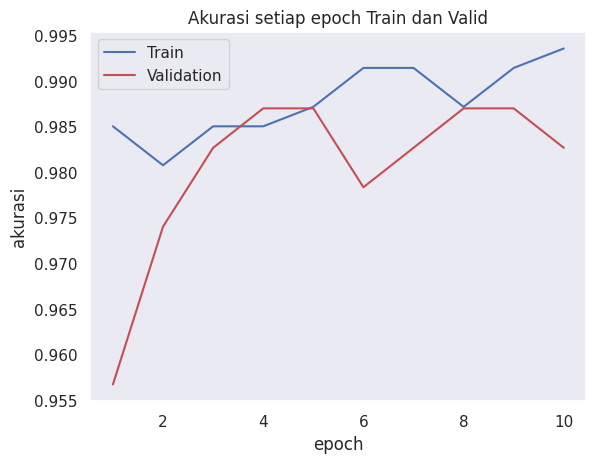

In [36]:
plot_rcord(train_accuracy,valid_accuracy,"Akurasi setiap epoch Train dan Valid","epoch","akurasi")

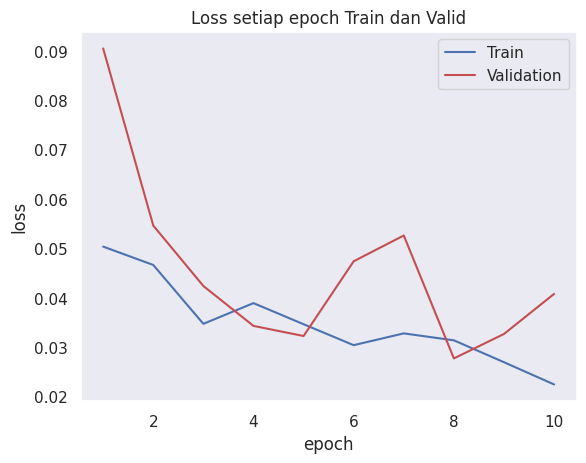

In [37]:
plot_rcord(train_loss,valid_loss,"Loss setiap epoch Train dan Valid","epoch","loss")

In [38]:
# cross validation
num_folds = 5
skf = StratifiedKFold(n_splits=num_folds, shuffle=True,random_state=22)

for index_train, index_test in skf.split(X,y):
    train_x, test_x = X[index_train],X[index_test]
    train_y, test_y = y[index_train], y[index_test]

    model.compile(
    loss='binary_crossentropy',
    optimizer=RMSprop(learning_rate=0.001),
    metrics=['accuracy']
    )

    model.fit(train_x,train_y,epochs=200,verbose=0)
    scores = model.evaluate(test_x,test_y, verbose=0)

    print("Validation accuracy: {:.2f}%".format(scores[1] * 100))


Validation accuracy: 97.86%
Validation accuracy: 100.00%
Validation accuracy: 100.00%
Validation accuracy: 100.00%
Validation accuracy: 100.00%
